# Машинное обучение, ФКН ВШЭ
## Практическое задание 8

### Общая информация

Дата выдачи: 14.03.2019

Мягкий дедлайн: 24.03.2019 05:59 MSK

Жёсткий дедлайн: 28.03.2019 05:59 MSK

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость», которая будет объявлена после жёсткого дедлайна. Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

В финальной версии ноутбука, которая отправляется для сдачи задания, должны быть быть выполнены следующие условия:
* все ячейки выполнены для представленной в ноутбуке версии кода;
* результаты выполнения ячеек отображены и согласованы с кодом;
* при повторном запуске ячеек результаты должны воспроизводиться с точностью до случайности.


### Формат сдачи

Задания сдаются через систему anytask. Посылка должна содержать:

* Ноутбук homework-practice-08-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold.t_sne import TSNE
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_rand_score, silhouette_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Кластеризация

Задача [кластеризации](https://en.wikipedia.org/wiki/Cluster_analysis) данных является одним из примеров задач обучения "без учителя". Она заключается в разбиении множества объектов на заданное число кластеров, при этом предполагается, что внутри одного кластера будут находиться похожие между собой объекты. Одним из примеров методов кластеризации является алгоритм [KMeans](https://en.wikipedia.org/wiki/K-means_clustering).

### Выбор числа кластеров

Для некоторых алгоритмов кластеризации число кластеров является гиперпараметром (например, в случае KMeans). Поэтому для выбора количества кластеров может быть использован следующий подход: при фиксированной метрике качества для разного числа кластеров обучают алгоритм и выбирают то значение гиперпараметра, начиная с которого качество "стабилизируется".

### Метрики качества

Оценивание качества построенной кластеризации — не всегда тривиальная задача, поскольку следует учитывать ряд фактов:
 - объекты одного класса должны быть более похожими, чем объекты других кластеров, относительно некоторой заданной метрики похожести
 - метрика не должна учитывать истинные значения меток объектов, попавших в кластер (в случае, если истинные метки известны)

При выполнении задания для оценки качества получившейся кластеризации воспользуемся следующими метриками:
 - [Homogeneity и Completeness](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure) 
 - [Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) 
 - [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

Загрузите набор данных [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Перед применением алгоритмов не забудьте перемешать изображения в случайном порядке.

In [2]:
X,y = load_digits(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

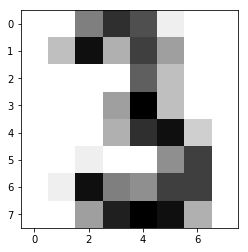

In [3]:
plt.imshow(X_train[0].reshape([8,8]), cmap = 'gray_r')

**1. (2 балла)** Кластеризуйте изображения при помощи алгоритма [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), подобрав число кластеров для каждой из метрик, указанных выше. Рассмотрите различные способы выбора начального приближения (параметр *init*). Оцените качество получившейся кластеризации, используя все описанные выше метрики. Визуализируйте изображения, соответствующие центроидам лучшей кластеризации.

Homogeneity (init = k-means++) - 0.7535706136718378
Completeness (init = k-means++) - 0.7602070847301448
Adjusted rand index (init = k-means++) - 0.6800358502363043
Silhouette coefficient (init = k-means++) - 0.33616712651610475
Homogeneity (init = random) - 0.746085001775319
Completeness (init = random) - 0.7528548221939224
Adjusted rand index (init = random) - 0.6698106451157363
Silhouette coefficient (init = random) - 0.319425604930785


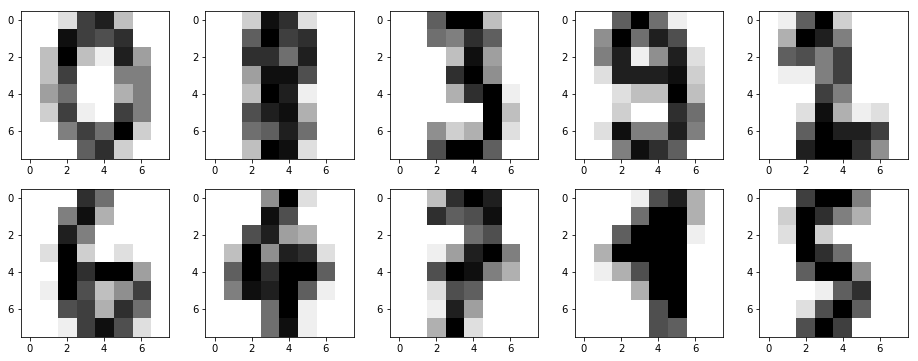

In [4]:
inits = ['k-means++', 'random']
models = []
for init in inits:
    kmeans = KMeans(init=init, n_clusters=10)
    kmeans.fit(X_train)
    models.append(kmeans)
    print(f"Homogeneity (init = {init}) - {homogeneity_score(y_test, kmeans.predict(X_test))}")
    print(f"Completeness (init = {init}) - {completeness_score(y_test, kmeans.predict(X_test))}")
    print(f"Adjusted rand index (init = {init}) - {adjusted_rand_score(y_test, kmeans.predict(X_test))}")
    print(f"Silhouette coefficient (init = {init}) - {silhouette_score(y_test.reshape(-1,1), kmeans.predict(X_test))}")

plt.figure(figsize = (16,6))
transformed = models[0].transform(X_train)
for number in range(10):
    plt.subplot(2, 5 , number+1)
    plt.imshow(X_train[np.where(transformed[:,number] == np.min(transformed[:,number]))].reshape(8,8), cmap='gray_r')

Не всегда бывает удобно работать с полной матрицей объект—признак — например, для визуализации подходят лишь выборки размерности не больше трёх. На лекциях был рассмотрен метод уменьшения размерности *PCA*. В документации sklearn есть [сравнение](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py) различных способов понижения размерности для проекции на плоскость. На изображениях видно, что некоторые преобразования дают неплохую визуализацию, где одинаковые цифры расположены близко друг к другу. Посмотрим, поможет ли это на практике.
 
**2. (1 балл)** Примените преобразования [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) и [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (для числа компонент 2 и 10), проведите кластеризацию в новых признаковых пространствах и сравните результаты с предыдущими. Нашелся ли метод кластеризации, превосходящий другие по всем метрикам? Являются ли все три метрики согласованными? Можете ли вы объяснить, почему так произошло?

In [5]:
pca_2 = PCA(n_components=2)
pca_10 = PCA(n_components=10)

tsne_2 = TSNE(n_components = 2)
tsne_10 = TSNE(n_components = 10, method='exact')
names = ['PCA, 10 components','PCA, 2 components','t-SNE, 10 components','t-SNE, 2 components']
models = [pca_10,pca_2,tsne_10, tsne_2]

kmeans = KMeans(n_clusters=10)
test_answers = []
counter = 0
for model in models:
    train = model.fit_transform(X_train)
    #test = model.transform(X_test)
    kmeans.fit(train)
    print(f'~~~~~~~~ {names[counter]} ~~~~~~~~')
    counter += 1
    test_prediction = kmeans.predict(train)
    print(f"Homogeneity - {homogeneity_score(y_train, test_prediction)}")
    print(f"Completeness - {completeness_score(y_train, test_prediction)}")
    print(f"Adjusted rand index - {adjusted_rand_score(y_train, test_prediction)}")
    print(f"Silhouette coefficient - {silhouette_score(y_train.reshape(-1,1), test_prediction)}")
    predict = kmeans.predict(train)
    true_labels = np.zeros(10)
    for i in range(10):
        true_labels[i] = pd.value_counts(y_train[np.where(predict == i)]).index[0]
    func = np.vectorize(lambda x: true_labels[x])
    test_answers.append(func(test_prediction))

~~~~~~~~ PCA, 10 components ~~~~~~~~
Homogeneity - 0.7230933762744403
Completeness - 0.7324267401223062
Adjusted rand index - 0.6410335722790121
Silhouette coefficient - 0.3238613222442268
~~~~~~~~ PCA, 2 components ~~~~~~~~
Homogeneity - 0.5470929847352917
Completeness - 0.5508647946670564
Adjusted rand index - 0.4229646278105846
Silhouette coefficient - 0.03533278601149178
~~~~~~~~ t-SNE, 10 components ~~~~~~~~
Homogeneity - 0.8284899089301472
Completeness - 0.8361553859824575
Adjusted rand index - 0.7692002283818392
Silhouette coefficient - 0.5067873753113827
~~~~~~~~ t-SNE, 2 components ~~~~~~~~
Homogeneity - 0.8945639075022263
Completeness - 0.8969481550303403
Adjusted rand index - 0.8578747686804822
Silhouette coefficient - 0.6166440648638842


**3. (1 балл)** Визуализируйте несколько изображений, которые во всех случаях были отнесены к неправильному кластеру (объект назовем ошибочно отнесенным, если он имеет иную метку класса, нежели большая часть объектов в кластере). Можете ли вы пояснить, почему так произошло?

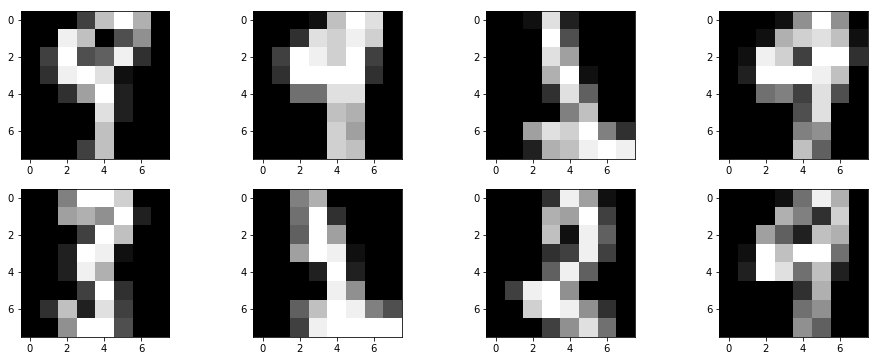

In [6]:
all_wrong = X_train[np.all(test_answers != y_train, axis = 0)]
plt.figure(figsize = (16,6))
for i in range(8):
    plt.subplot(2,4, i+1)
    plt.imshow(all_wrong[i].reshape(8,8), cmap = 'gray')

В этих примерах трудно понять что написано, так как присутствуют черты

## Разделение изображения на семантические компоненты

![RedPanda](http://imgur.com/6Aa52Lm.png)

Алгоритмы кластеризации могут применяться в самых разных целях. Например, в анализе изображений есть задача разделения изображения на семантические компоненты, которую можно решать в том числе с помощью алгоритмов кластеризации. 

Выберите несколько (не менее 5) своих любимых изображений, для которых вы будете применять методы из следующих пунктов (за выбор изображений могут быть начислены бонусные баллы!).

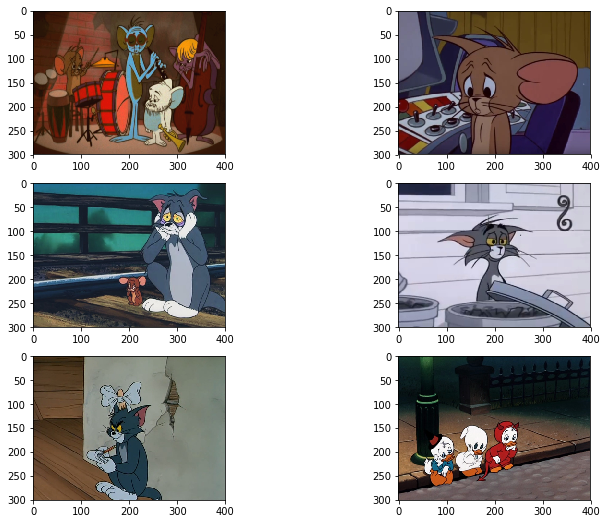

In [7]:
import cv2
images = []
for i in range(6):
    image = cv2.cvtColor(cv2.imread(f'pic{i+1}.jpg'),cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (400,300))
    images.append(image)
plt.figure(figsize = (12,9))
for number in range(6):
    plt.subplot(3, 2, number+1)
    plt.imshow(images[number])

**4. (2 балла)** Для каждого изображения, используя кластеризацию KMeans, выделите компоненты, охарактеризовав каждый пиксель вектором признаков $\psi_i = [\lambda x_i, \lambda y_i, r_i, g_i, b_i]$, где 
$x_i$ и $y_i$ — координаты пикселя, $r_i, g_i, b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

In [8]:
new_images = []
#lambda
l = 1

for img in images:
    new_image = []
    for row in range(300):
        for column in range(400):
            r,g,b = img[row,column]
            x = column
            y = row
            new_image.append([l*x, l*y, r, g, b])
    new_images.append(new_image)


In [9]:
kmeans = KMeans()
predictions = []
for i in range(6):
    img = new_images[i]
    kmeans.fit(img)
    predictions.append(kmeans.predict(img))


**5. (2 балла)** Попробуйте выделить сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету. При необходимости можно сжать изображения (в пределах разумного).

In [10]:
#on my laptop it takes toooo long 

**6. (1 балл)** Визуализируйте результаты сегментации (аналогично рисунку выше) для обоих методов. [Пример кода для визуализации](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html).

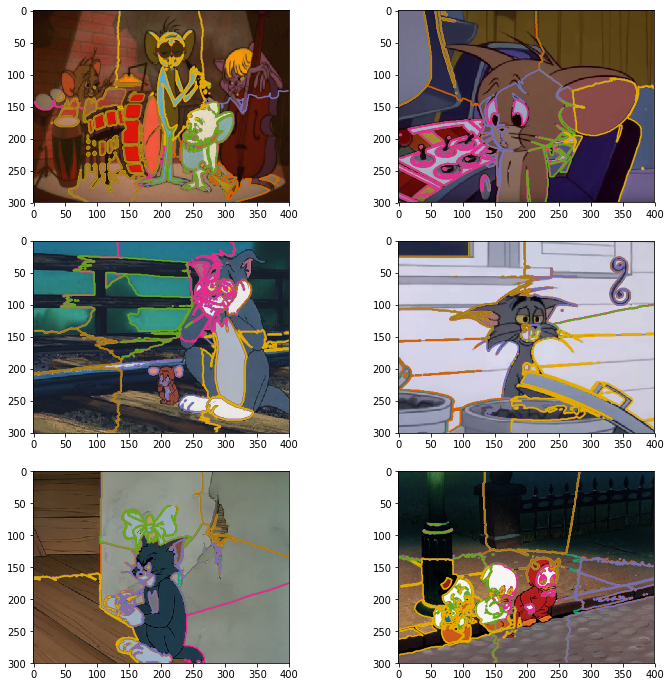

In [11]:
plt.figure(figsize = (12,12))
for number in range(6):
    plt.subplot(3, 2, number+1)
    plt.imshow(images[number])
    x = np.arange(400)
    y = np.arange(300)
    X,Y = np.meshgrid(x,y)
    labels = predictions[number].reshape([300,400])
    plt.contour(X,Y, labels, cmap='Dark2')

**7. (1 балл)** Поэкспериментируйте с параметрами алгоритмов и параметром $\lambda$ в признаках. Сравните два подхода и сегментации, к которым они приводят.
Для всех ли изображений в результате сегментации хорошо видны контуры объектов?

In [12]:
def train_and_show(img, model, lambdas, cmap ='jet'):
    number = 0
    for l in lambdas:
        new_image = []
        for row in range(300):
            for column in range(400):
                r,g,b = img[row,column]
                x = column
                y = row
                new_image.append([l*x, l*y, r, g, b])
        prediction = model.fit_predict(new_image)
        plt.subplot(np.ceil(len(lambdas)/2), 2, number+1)
        plt.imshow(img)
        x = np.arange(400)
        y = np.arange(300)
        X,Y = np.meshgrid(x,y)
        labels = prediction.reshape([300,400])
        plt.contour(X,Y, labels, cmap=cmap)
        plt.title(f'lambda = {l}')
        number +=1
        

CPU times: user 55.4 s, sys: 2.13 s, total: 57.5 s
Wall time: 41.3 s


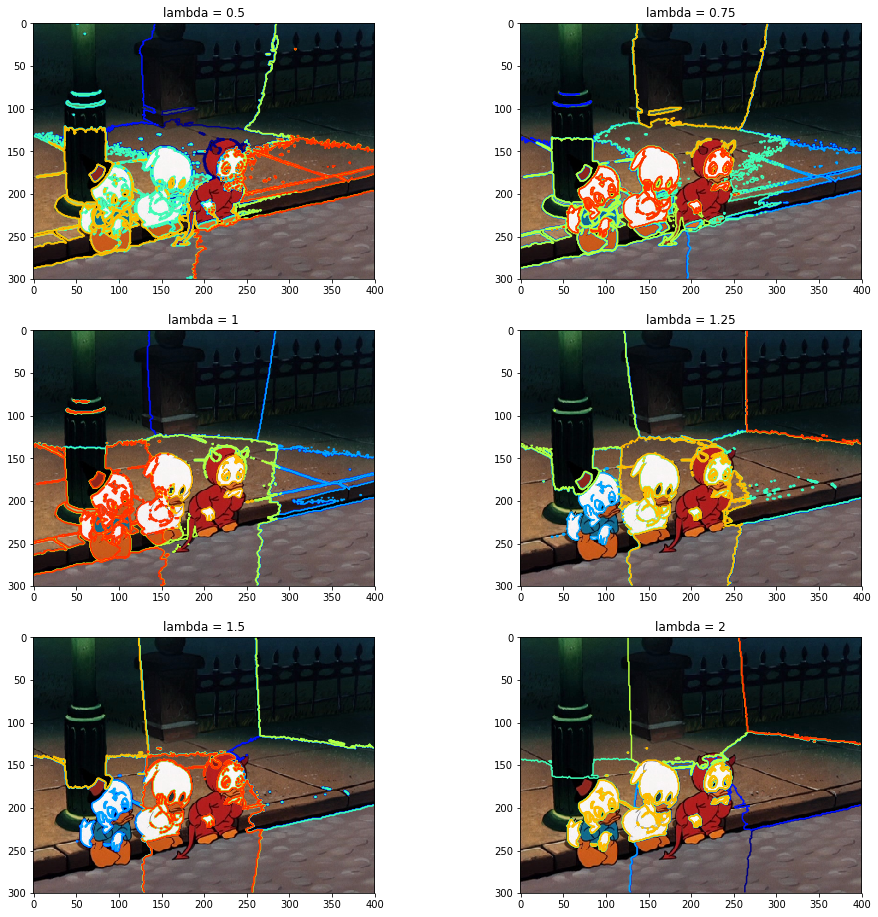

In [13]:
%%time

plt.figure(figsize = (16,16))
train_and_show(img = images[5], model = KMeans(), lambdas = [0.5,0.75,1,1.25,1.5,2])

CPU times: user 24 s, sys: 932 ms, total: 24.9 s
Wall time: 19.3 s


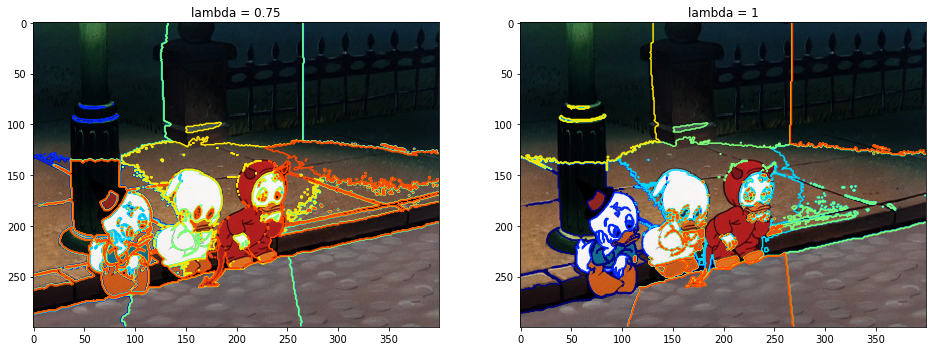

In [14]:
%%time

plt.figure(figsize = (16,16))
train_and_show(img = images[5], model = KMeans(n_clusters = 10), lambdas = [0.75,1])

CPU times: user 31 s, sys: 1.25 s, total: 32.2 s
Wall time: 26.5 s


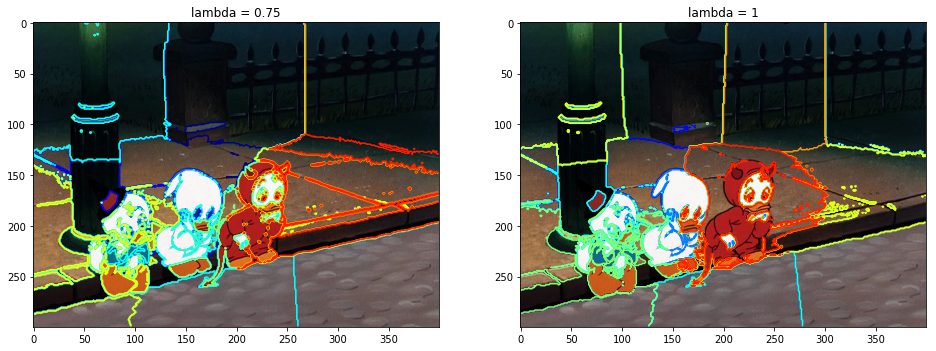

In [15]:
%%time

plt.figure(figsize = (16,16))
train_and_show(img = images[5], model = KMeans(n_clusters = 12), lambdas = [0.75,1])

Измерять качество сегментации в этом пункте не нужно, в результате ожидаются только картинки и выводы.

### Рекомендации к выполнению
Для работы с изображениями удобно использовать библиотеку [Scikit-Image](http://scikit-image.org). 
Установите [PIL](http://www.pythonware.com/products/pil/) для возможности чтения формата JPG.

Пример чтения изображения в матрицу:

    from skimage.io import imread
    I = imread('http://www.birdsgallery.net/gallery/parrots/parrots_4.jpg')

    figure(figsize=(15, 5))
        for i in xrange(3):
        subplot(1, 3, i)
        imshow(I[:,:,i])